<a href="https://colab.research.google.com/github/NeoLeMarc/colab/blob/main/keras01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and rf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist
(otrain_images, train_labels), (otest_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2.5.0
4423680/4422102 [==============================] - 0s 0us/step


# Analyze and prepare input data

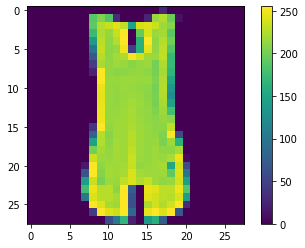

T-shirt/top


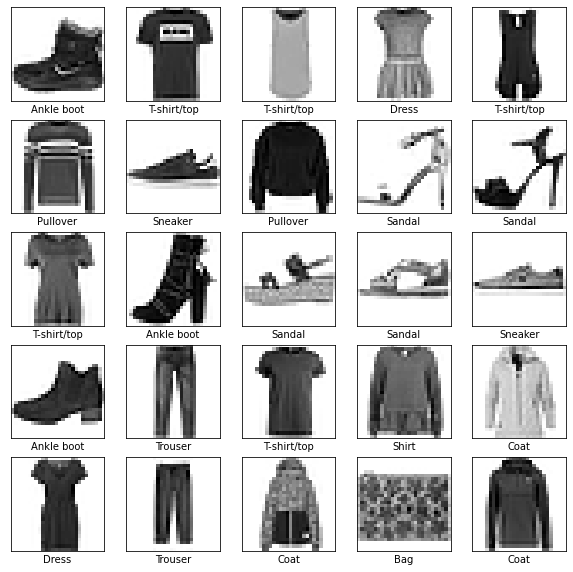

In [4]:
otrain_images.shape
len(train_labels)
train_labels[0]

def show(img):
  plt.figure()
  plt.imshow(img)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def pshow(pos):
  img = otrain_images[pos]
  label = train_labels[pos]
  show(img)
  print(class_names[label])

pshow(4)


train_images = otrain_images / 255.0
test_images = otest_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


# Build and compile the model



In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model


In [6]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4958 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2659 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2543 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2468 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

# Evaluate accuracy


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3218 - accuracy: 0.8848

Test accuracy: 0.8848000168800354


# Make predictions

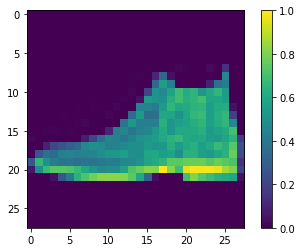

Predicted: Ankle boot (actually: Ankle boot)


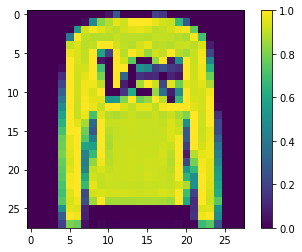

Predicted: Pullover (actually: Pullover)


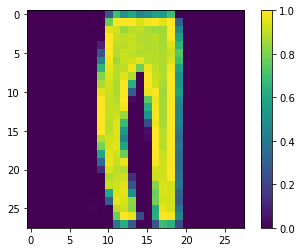

Predicted: Trouser (actually: Trouser)


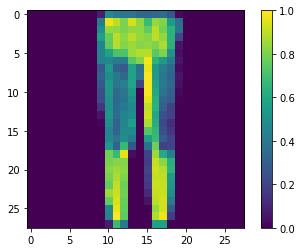

Predicted: Trouser (actually: Trouser)


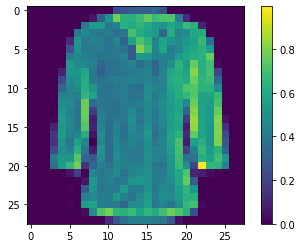

Predicted: Shirt (actually: Shirt)


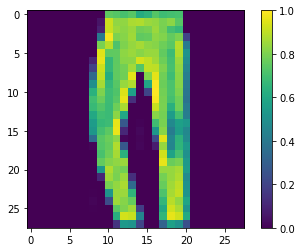

Predicted: Trouser (actually: Trouser)


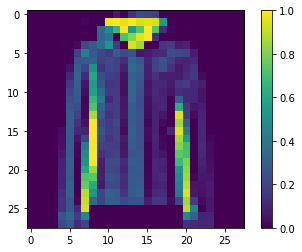

Predicted: Coat (actually: Coat)


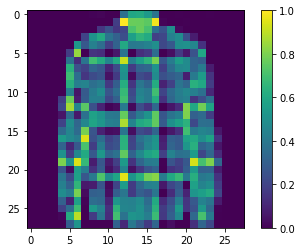

Predicted: Shirt (actually: Shirt)


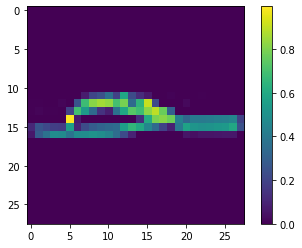

Predicted: Sandal (actually: Sandal)


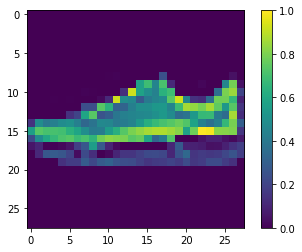

Predicted: Sneaker (actually: Sneaker)


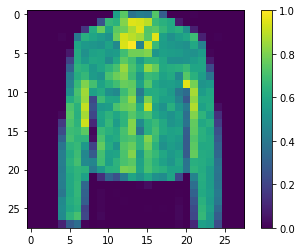

Predicted: Coat (actually: Coat)


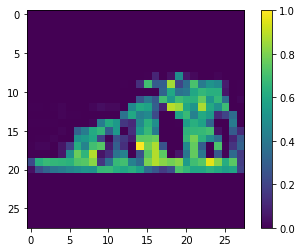

Predicted: Sandal (actually: Sandal)


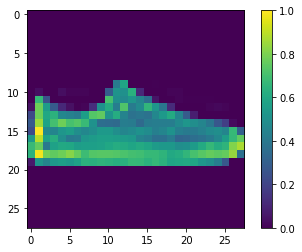

Predicted: Sandal (actually: Sneaker)


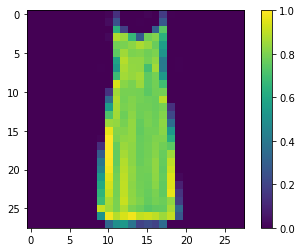

Predicted: Dress (actually: Dress)


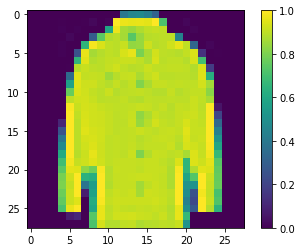

Predicted: Coat (actually: Coat)


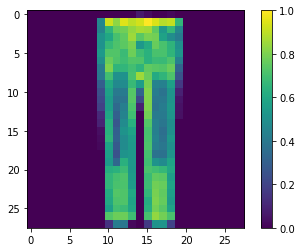

Predicted: Trouser (actually: Trouser)


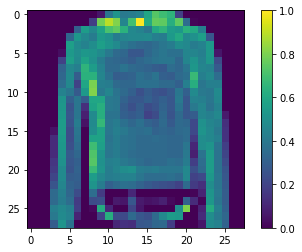

Predicted: Pullover (actually: Pullover)


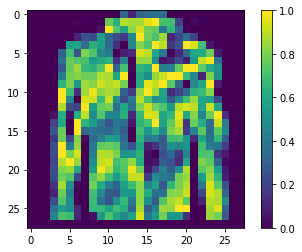

Predicted: Pullover (actually: Coat)


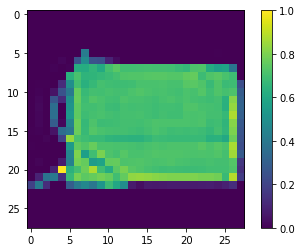

Predicted: Bag (actually: Bag)


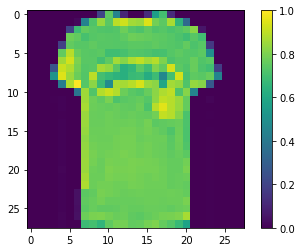

Predicted: T-shirt/top (actually: T-shirt/top)


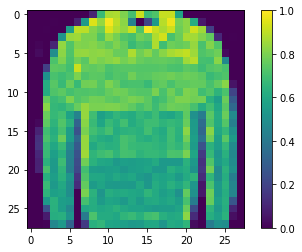

Predicted: Pullover (actually: Pullover)


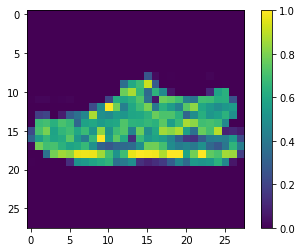

Predicted: Sandal (actually: Sandal)


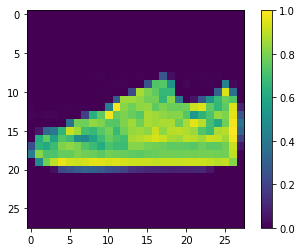

Predicted: Sneaker (actually: Sneaker)


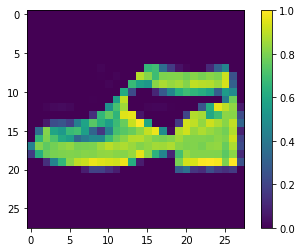

Predicted: Sandal (actually: Ankle boot)


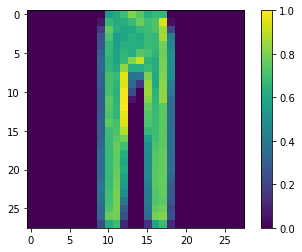

Predicted: Trouser (actually: Trouser)


In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

def plabel(pos):
  prediction = np.argmax(predictions[pos])
  print("Predicted: %s (actually: %s)" % (class_names[prediction], class_names[test_labels[pos]]))

for i in range(25):
  show(test_images[i])
  plabel(i)

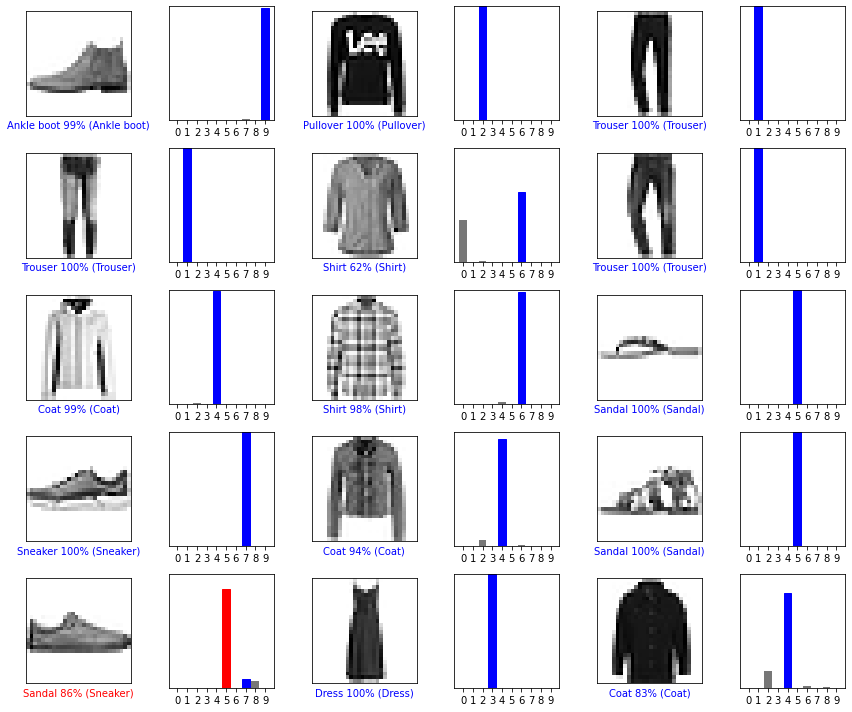

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model




(28, 28)
(1, 28, 28)
[[1.06680505e-04 4.70897044e-10 9.99246597e-01 1.55303728e-10
  2.70676654e-04 2.86854552e-13 3.75975826e-04 2.18601416e-14
  6.52821663e-09 1.05076503e-11]]


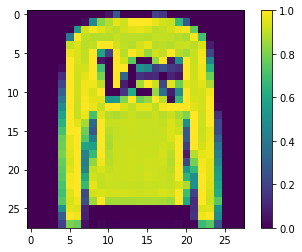

2


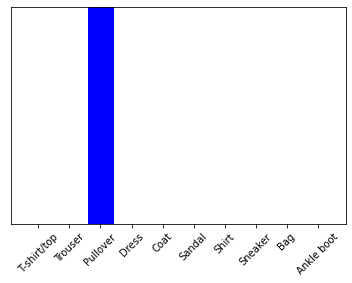

In [26]:
img = test_images[1]
print(img.shape)

# Add the image to a batch where it's the only member
img = (np.expand_dims(img, 0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

show(test_images[1])
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print(np.argmax(predictions_single[0]))

